In [1]:
from plato.environment import Environment

In [2]:
config = {
  "whites":{
    "params":{
    "n_white_infantry":50,
    "n_white_vehicle":10,
    "n_white_drone":5},
    "init":"E"
  },

  "blacks":{
    "params":{
    "n_black_infantry":50,
    "n_black_vehicle":10,
    "n_black_drone":5},
    "init":"W"
  }
}

In [3]:
sim = Environment(config, shape=(100,100))

In [4]:
obs = sim.reset()

In [5]:
for id_,w in sim.whites.items(): print('{:13}'.format(id_), w)

WICHITA       <plato.entity.infantry.Infantry object at 0x11059c610>
ATLANTATOKYO  <plato.entity.infantry.Infantry object at 0x110a9f690>
BRAVO         <plato.entity.infantry.Infantry object at 0x1112930d0>
SEAGULL       <plato.entity.infantry.Infantry object at 0x111293b90>
AMERICA       <plato.entity.infantry.Infantry object at 0x111297690>
MONSOON       <plato.entity.infantry.Infantry object at 0x11129a190>
MAHAN         <plato.entity.infantry.Infantry object at 0x11129ac50>
SIERRA        <plato.entity.infantry.Infantry object at 0x11129b750>
BOUGANSVILLE  <plato.entity.infantry.Infantry object at 0x11129c250>
LEYTEGULF     <plato.entity.infantry.Infantry object at 0x11129cd10>
PRESCOTT      <plato.entity.infantry.Infantry object at 0x111275f90>
FLAGSTAFF     <plato.entity.infantry.Infantry object at 0x1112a1410>
HURRICANE     <plato.entity.infantry.Infantry object at 0x1112a1ed0>
STUTTGART     <plato.entity.infantry.Infantry object at 0x1112a39d0>
WYOMING       <plato.entity.infant

In [6]:
for id_,w in sim.blacks.items(): print('{:13}'.format(id_), w)

unknown_0     <plato.entity.infantry.Infantry object at 0x1112f4a10>
unknown_1     <plato.entity.infantry.Infantry object at 0x1112f4a50>
unknown_2     <plato.entity.infantry.Infantry object at 0x1112f7550>
unknown_3     <plato.entity.infantry.Infantry object at 0x1112fa050>
unknown_4     <plato.entity.infantry.Infantry object at 0x1112fab10>
unknown_5     <plato.entity.infantry.Infantry object at 0x1112fb610>
unknown_6     <plato.entity.infantry.Infantry object at 0x1112fc110>
unknown_7     <plato.entity.infantry.Infantry object at 0x1112fcbd0>
unknown_8     <plato.entity.infantry.Infantry object at 0x1112fd6d0>
unknown_9     <plato.entity.infantry.Infantry object at 0x1112ff1d0>
unknown_10    <plato.entity.infantry.Infantry object at 0x1112ffc90>
unknown_11    <plato.entity.infantry.Infantry object at 0x111301790>
unknown_12    <plato.entity.infantry.Infantry object at 0x111303290>
unknown_13    <plato.entity.infantry.Infantry object at 0x111303d50>
unknown_14    <plato.entity.infant

In [7]:
minimap = sim.observation(sim.whites, negative=None)
minimap.shape

(25, 100, 100)

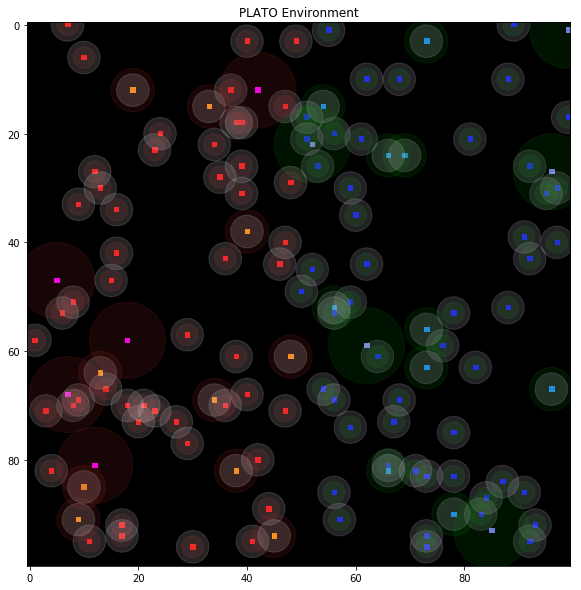

In [8]:
terminal = False
while not terminal:
    whites = {id:ent.random_action() for id,ent in sim.whites.items() if ent.operational}
    blacks = {id:ent.random_action() for id,ent in sim.blacks.items() if ent.operational}
    
    sprime, reward, terminal, metdata = sim.step(whites, blacks)
    state = sprime
        
    sim.render()
    break

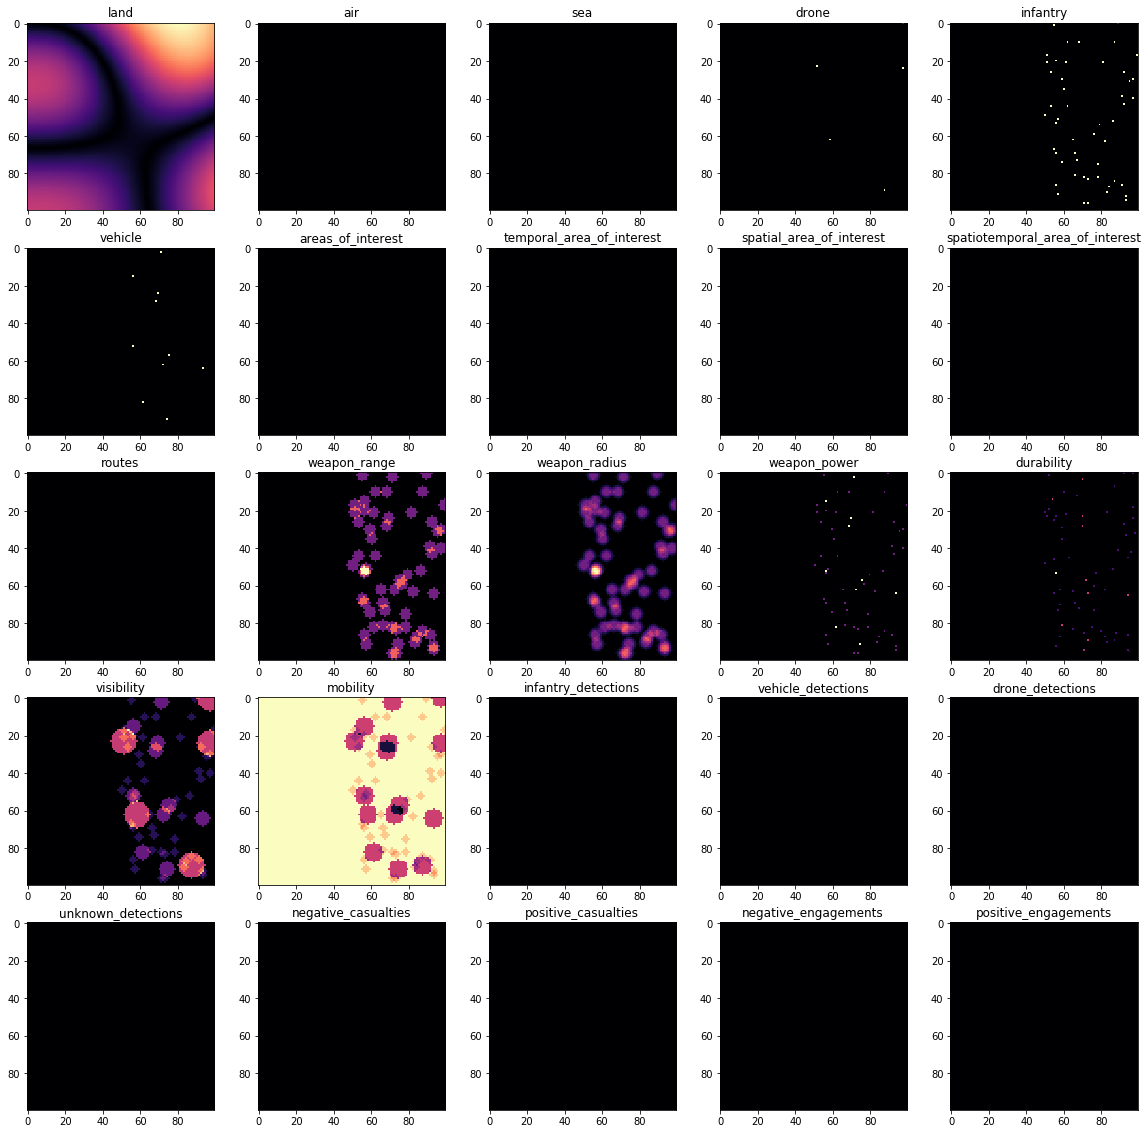

In [9]:
import numpy as np, matplotlib.pyplot as mp
from plato.features import global_features
fig,ax = mp.subplots(5,5, figsize=(20,20))
for itr,(name,feat) in enumerate(zip(global_features, minimap)):
    i,j = np.unravel_index(itr,(5,5))
    ax[i,j].set_title(name)
    ax[i,j].imshow(feat, cmap='magma')
mp.show()

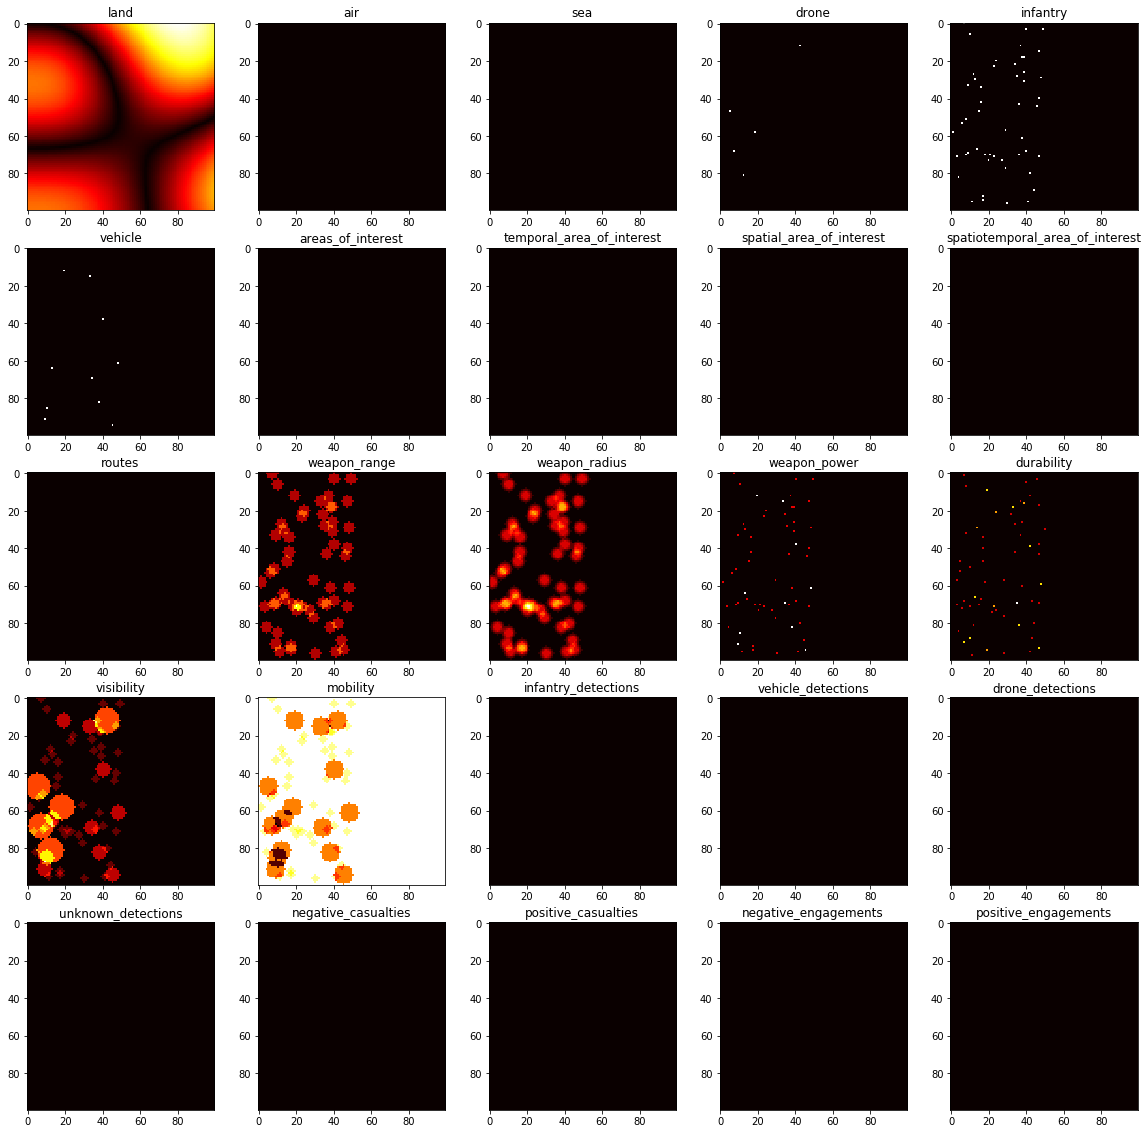

In [10]:
minimap = sim.observation(sim.blacks)
fig,ax = mp.subplots(5,5, figsize=(20,20))
for itr,(name,feat) in enumerate(zip(global_features, minimap)):
    i,j = np.unravel_index(itr,(5,5))
    ax[i,j].set_title(name)
    ax[i,j].imshow(feat, cmap='hot')
mp.show()